In [1]:
source("Main.R")
library("reshape2")
source("Conf.R")
source("Utilities.R")
source("DAVID_query.R")
library("factoextra")
library("maptree")
library(repr)


corrplot 0.84 loaded


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘pls’


The following object is masked from ‘package:corrplot’:

    corrplot


The following object is masked from ‘package:stats’:

    loadings


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following o

In [2]:
probDists = data.frame(matrix(0,nrow = 100,ncol = 1))
colnames(probDists) <- "0"

for( elem in 0:9){
    print(elem)
    
    bef <- read.csv(paste0("/home/beraslan/jovian-work/analysisSingle/EM_Outputs/",elem,"_X_EM.txt"),sep="\t")
    rownames(bef) <- bef$X 
    bef$X  <- NULL
    tt <- rowSums(bef)
    controlCells <-  names(tt[tt==0])
    
    
    k <- read.csv(paste0("/home/beraslan/jovian-work/analysisSingle/EM_Outputs/",elem,"_X_EM_adjust.txt"),sep="\t")
    rownames(k) <- k$X 
    k$X  <- NULL
    
    newProps <- rowSums(k)
    newProps <- newProps[names(newProps) %ni% controlCells]
    
    l <- cut(newProps, breaks = seq(0,1,0.01))
    tp <- data.frame(table(l))
    
    if(elem == 0){
        probDists[,"0"] <- tp$Freq
        rownames(probDists) <- as.character(tp$l)
        colnames(probDists) <- elem
    }else{
        probDists[as.character(tp$l),as.character(elem)] <- tp$Freq
    } 
    
}


[1] 0
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9


In [3]:
head(probDists)

,0,1,2,3,4,5,6,7,8,9
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
"(0,0.01]",561,215,253,274,38,77,62,138,0,8
"(0.01,0.02]",47,11,15,21,0,0,0,0,0,0
"(0.02,0.03]",46,12,11,12,0,0,0,1,0,0
"(0.03,0.04]",29,7,10,6,0,1,0,0,0,1
"(0.04,0.05]",23,7,4,7,0,0,0,0,0,0
"(0.05,0.06]",15,6,10,8,0,0,0,0,0,0


In [4]:
probDistFreqM <- melt(as.matrix(probDists))

colnames(probDistFreqM) <- c("ProbInt", "Cluster", "Perc")
probDistFreqM$Cluster <- factor(probDistFreqM$Cluster, levels=0:9)
head(probDistFreqM)

,ProbInt,Cluster,Perc
,<fct>,<fct>,<int>
1,"(0,0.01]",0,561
2,"(0.01,0.02]",0,47
3,"(0.02,0.03]",0,46
4,"(0.03,0.04]",0,29
5,"(0.04,0.05]",0,23
6,"(0.05,0.06]",0,15


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“position_dodge requires non-overlapping x intervals”


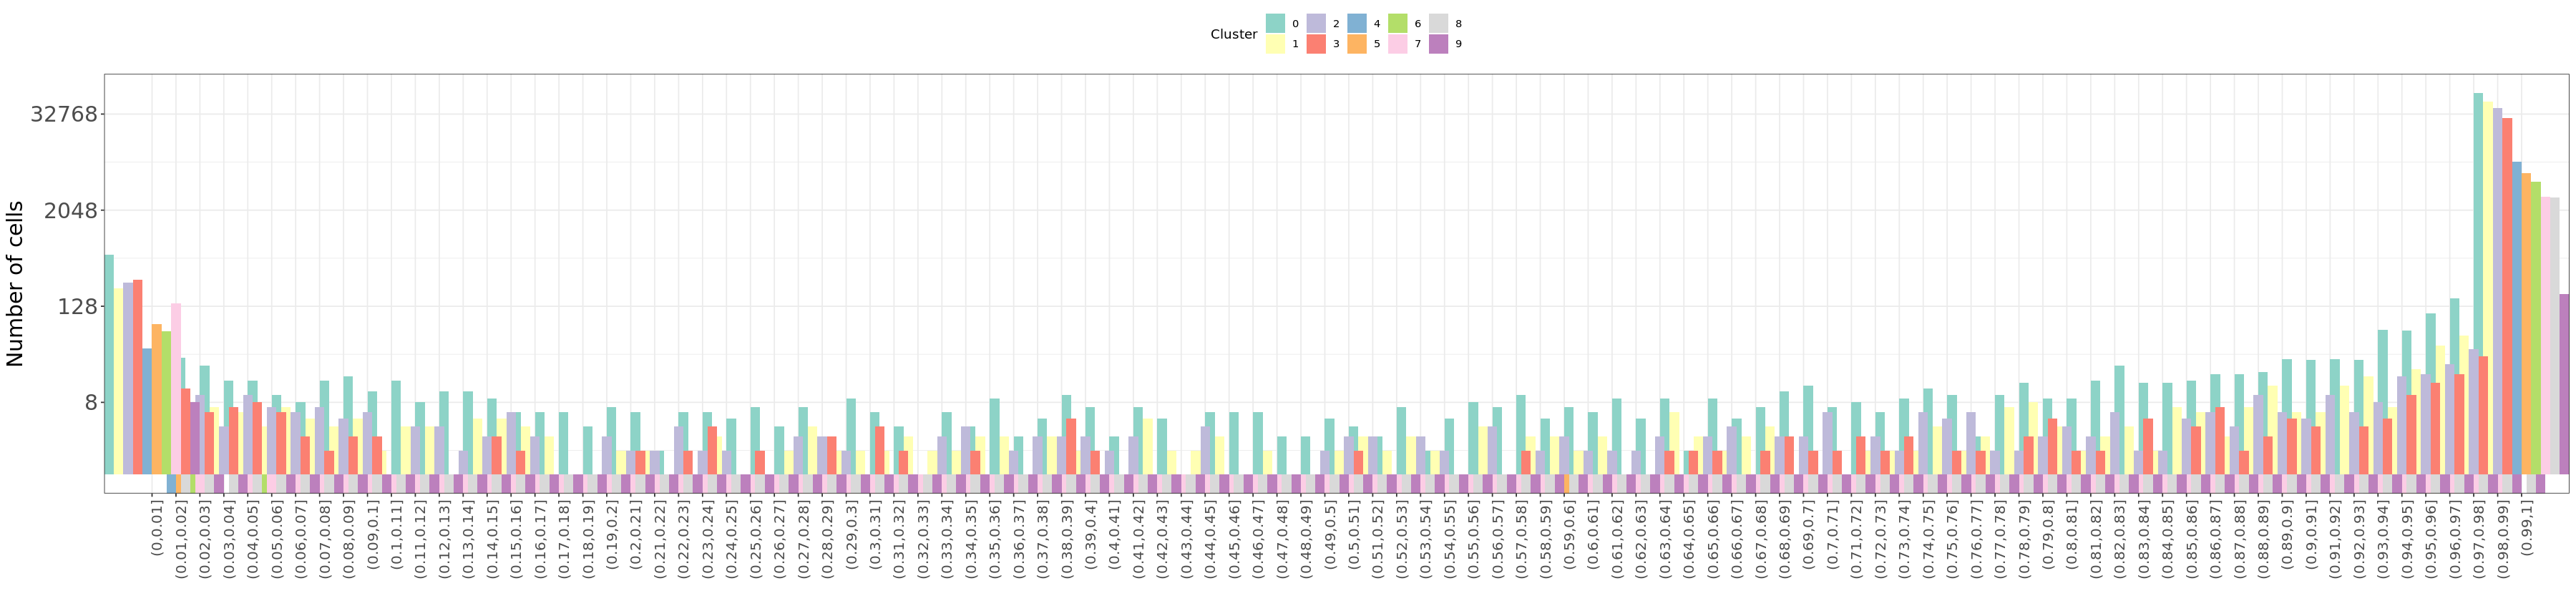

In [5]:
options(repr.plot.width=30, repr.plot.height=7)

ggplot(data=probDistFreqM, aes(x=ProbInt, y=Perc, fill=Cluster)) +
  geom_bar(stat="identity", position=position_dodge(), width = 4)+
  theme_bw()+scale_y_continuous(trans = "log2")+theme(axis.text.x = element_text(angle = 90, hjust = 1, size=12),
                                                      axis.text.y = element_text(size=18),
                                                      axis.title.y = element_text(size=18), legend.position="top")+
scale_fill_brewer(palette="Set3")+ylab("Number of cells")+xlab("")

In [6]:
selectedCells <- c()
allCells <- c()
cellCounts = data.frame()
for( elem in 0:9){
    
    bef <- read.csv(paste0("/home/beraslan/jovian-work/analysisSingle/EM_Outputs/",elem,"_X_EM.txt"),sep="\t")
    rownames(bef) <- bef$X 
    bef$X  <- NULL
    tt <- rowSums(bef)
    controlCells <-  names(tt[tt==0])
    
    print(elem)
    k <- read.csv(paste0("/home/beraslan/jovian-work/analysisSingle/EM_Outputs/",elem,"_X_EM_adjust.txt"),sep="\t")
    rownames(k) <- k$X 
    k$X  <- NULL
    
    newProps <- rowSums(k)
    allCells <- c(allCells,  names(newProps))
    selCells <- c(controlCells, names(newProps[newProps > 0.7]))
    
    cellCounts <- rbind(cellCounts, c(cluster=elem, allCellCount= length(newProps), selectedCellCount=length(selCells)))
    
    selectedCells <- c(selectedCells, selCells)
}

[1] 0
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9


In [7]:
length(selectedCells)

[1] 242938

In [8]:
colnames(cellCounts) <- c("Cluster", "Before_EM","After_EM")

In [9]:
cellCounts

Cluster,Before_EM,After_EM
<int>,<int>,<int>
0,74260,73118
1,57356,56937
2,47577,47119
3,35943,35525
4,9971,9917
5,7309,7191
6,5766,5645
7,4073,3741
8,3521,3521


In [10]:
cellCounts <- melt(cellCounts, id.vars = "Cluster")
head(cellCounts)

,Cluster,variable,value
,<int>,<fct>,<int>
1,0,Before_EM,74260
2,1,Before_EM,57356
3,2,Before_EM,47577
4,3,Before_EM,35943
5,4,Before_EM,9971
6,5,Before_EM,7309


In [11]:
str(cellCounts)

'data.frame':	20 obs. of  3 variables:
 $ Cluster : int  0 1 2 3 4 5 6 7 8 9 ...
 $ variable: Factor w/ 2 levels "Before_EM","After_EM": 1 1 1 1 1 1 1 1 1 1 ...
 $ value   : int  74260 57356 47577 35943 9971 7309 5766 4073 3521 274 ...


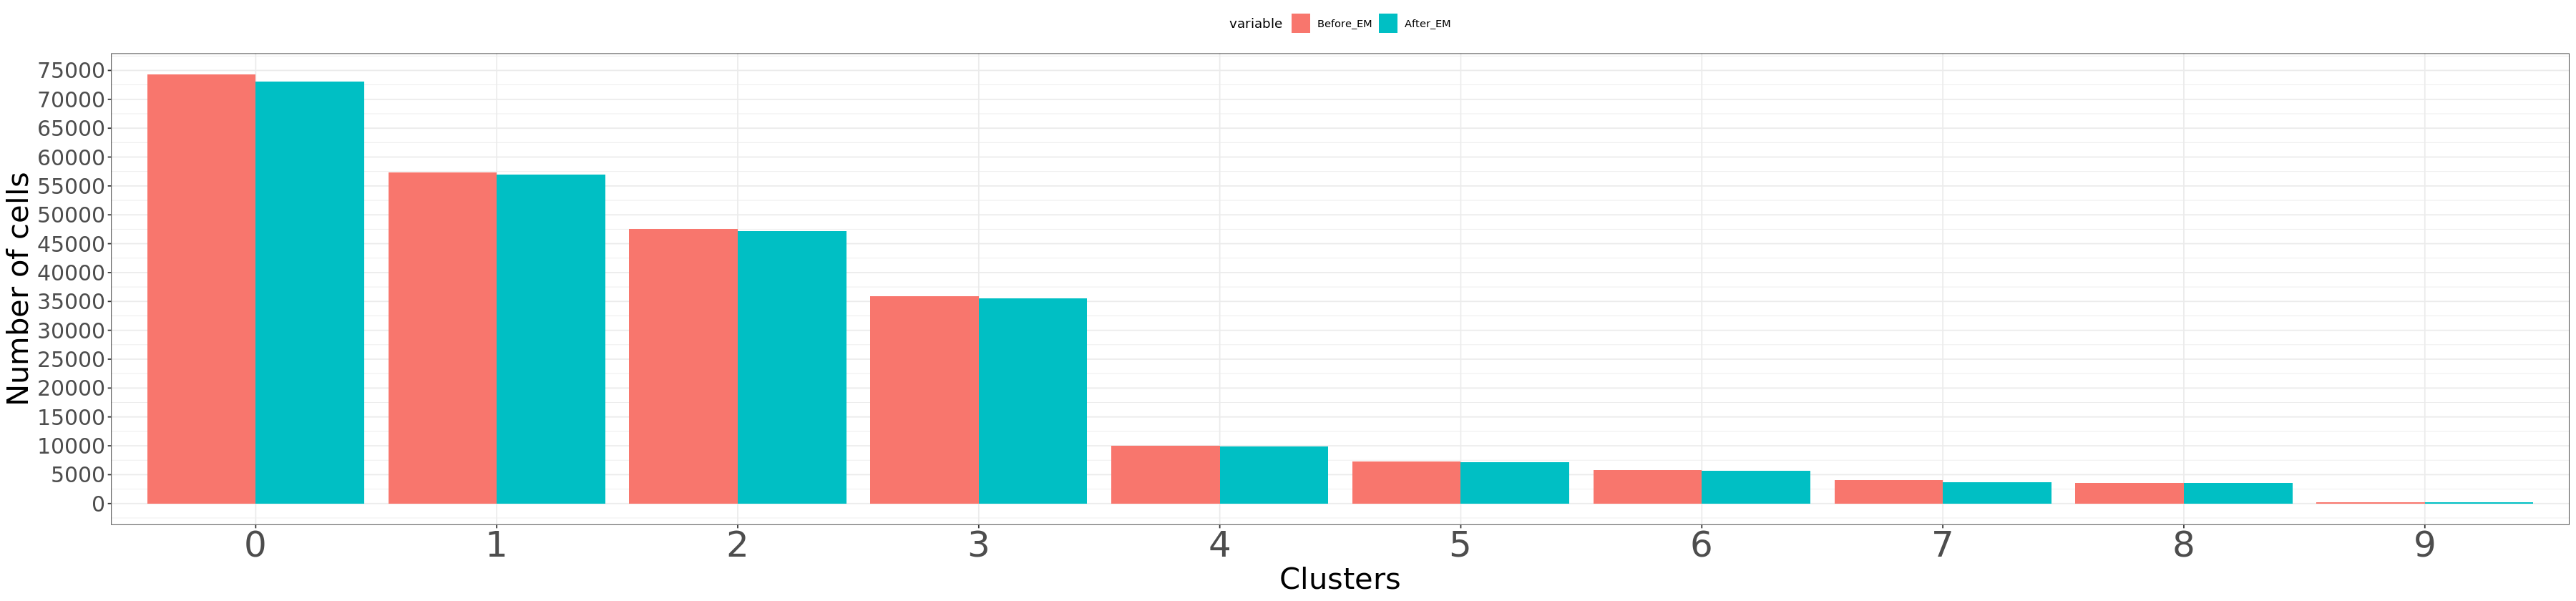

In [12]:
cellCounts$Cluster <- factor(cellCounts$Cluster, levels=0:9)
ggplot(data=cellCounts, aes(x=Cluster, y=value, fill=variable)) +
  geom_bar(stat="identity", position=position_dodge())+
  scale_y_continuous(breaks = seq(0,80000,5000), labels=seq(0,80000,5000))+
  theme_bw()+theme(axis.text.x = element_text(size=30),
                                                      axis.text.y = element_text(size=18),
                                                      axis.title = element_text(size=25), legend.position="top")+
ylab("Number of cells")+xlab("Clusters")

In [13]:
length(selectedCells)

[1] 242938

In [14]:
write.csv(selectedCells, file="/home/beraslan/jovian-work/analysisSingle/selectedCellsAfterEM.csv", quote=FALSE, row.names=FALSE)

In [ ]:
?write.csv